<a href="https://colab.research.google.com/github/Krishnan-Raghavan/Packt/blob/main/GameTheoryChapter4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the NumPy library for numerical operations
# NumPy is essential for handling arrays and matrices, which are fundamental in simulating game theory models and analyzing strategy outcomes.
import numpy as np

# Import matplotlib and seaborn libraries for plotting
# matplotlib is used for creating static, animated, and interactive visualizations in Python, making it invaluable for visualizing the dynamics and outcomes of game theory simulations.
# seaborn, built on top of matplotlib, provides a high-level interface for drawing attractive and informative statistical graphics. It's used here to improve the aesthetics of plots, making the simulation results more intuitive and engaging.
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns

# Set the style of the plots using seaborn for better aesthetics
# 'darkgrid' is chosen for its clean background and grid lines, which enhance the readability and presentation of plotted data.
sns.set_style('darkgrid')

# Enable interactive matplotlib figures in the Jupyter Notebook.
# This magic command (%matplotlib inline) ensures that plots are displayed directly below the code cells that produce them.
# It's crucial for interactive explorations in game theory simulations, allowing immediate visual feedback on the simulations' dynamics and outcomes.
%matplotlib inline

In [2]:
def replicator_dynamics(payoff_matrix, strategy_frequencies):
    """
    Calculate the replicator dynamics for a given payoff matrix and strategy frequencies.

    The replicator dynamics equation models how the frequency of strategies in a population change over time
    based on their payoffs compared to the average payoff in the population.

    Parameters:
    payoff_matrix (numpy.ndarray): The payoff matrix for the game, where payoff_matrix[i, j] represents
                                   the payoff received by strategy i when playing against strategy j.
    strategy_frequencies (numpy.ndarray): The current frequencies of each strategy in the population,
                                          where each element corresponds to a strategy and its value
                                          represents its proportion in the population.

    Returns:
    numpy.ndarray: The change in frequency of each strategy, indicating how each strategy's frequency
                   is expected to change based on the current state.
    """

    # Calculate the average payoffs for each strategy. This is done by matrix multiplication (@) of the
    # payoff matrix with the strategy frequencies vector. The result is a vector where each element
    # represents the average payoff received by a strategy given the current distribution of strategies.
    average_payoffs = payoff_matrix @ strategy_frequencies

    # Calculate the average population payoff. This is achieved by taking the dot product of the strategy
    # frequencies vector with the average payoffs vector. The result is a single number representing
    # the average payoff in the population given the current distribution of strategies.
    average_population_payoff = strategy_frequencies @ average_payoffs

    # Calculate the change in frequency of each strategy. This is the core of the replicator dynamics,
    # where the change in frequency for each strategy is proportional to the difference between its average
    # payoff and the average population payoff, multiplied by its current frequency. Strategies that perform
    # better than average will grow in frequency, while those that perform worse will decline.
    change_in_frequencies = strategy_frequencies * (average_payoffs - average_population_payoff)

    return change_in_frequencies

In [3]:
# Prisoner's Dilemma Payoffs
# Define the payoffs for the Prisoner's Dilemma, a fundamental game in game theory
# that illustrates why two rational individuals might not cooperate, even if it appears
# that it is in their best interest to do so.
temptation = 5  # Temptation to defect: The payoff a player receives if they defect while the other cooperates
reward = 3      # Reward for mutual cooperation: The payoff each player receives if both cooperate
punishment = 1  # Punishment for mutual defection: The payoff each player receives if both defect
sucker = 0      # Sucker's payoff: The payoff a player receives if they cooperate while the other defects

# Payoff matrix for Prisoner's Dilemma
# This matrix represents the payoffs for each combination of strategies between two players.
# The rows represent the strategy chosen by the player implementing the matrix, and the columns
# represent the strategy chosen by the other player. Each entry (i, j) in the matrix corresponds
# to the payoff the player receives when they choose strategy i and the other player chooses strategy j.
payoff_matrix = np.array([
    [reward, sucker],     # Row 0: Payoffs when the player cooperates (Cooperate-Cooperate, Cooperate-Defect)
    [temptation, punishment]  # Row 1: Payoffs when the player defects (Defect-Cooperate, Defect-Defect)
])

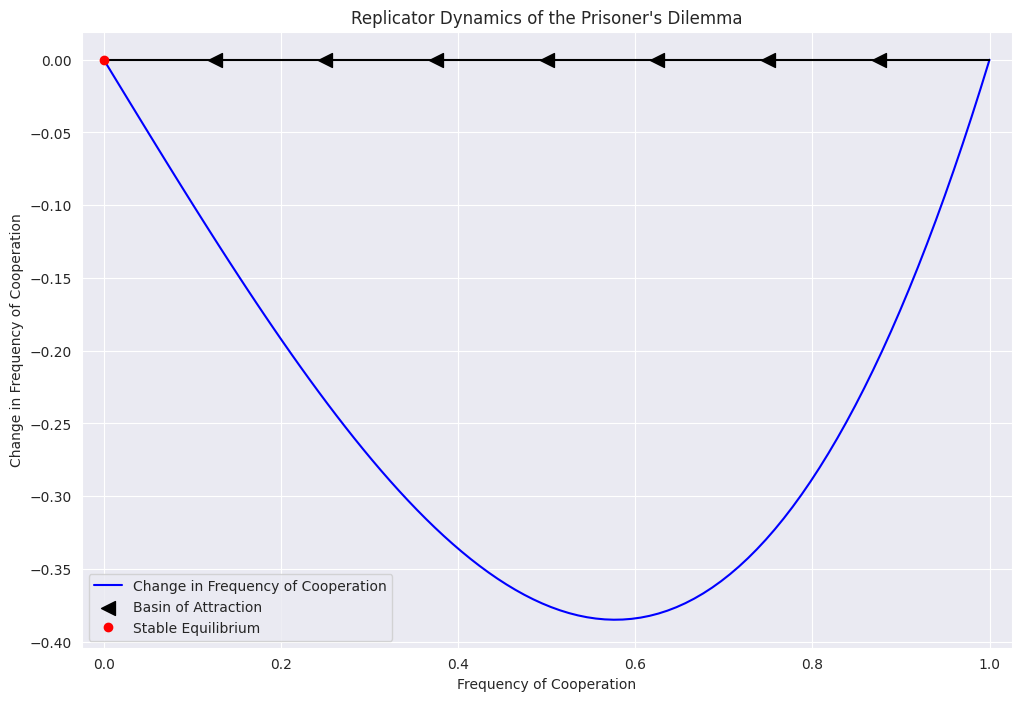

In [4]:
# Define the range of strategy frequencies for cooperation
# Creates an array of 100 evenly spaced values between 0 and 1. These represent the proportion of the population
# adopting a cooperative strategy, varying from complete defection (0) to complete cooperation (1).
p = np.linspace(0, 1, 100)
diff_coop = []  # Initialize a list to store the change in cooperation frequency for each proportion

# Calculate the change in cooperation frequency across the range of cooperation levels
for freq in p:
    # For each frequency of cooperation, calculate the corresponding frequency of defection
    strategy_frequencies = np.array([freq, 1 - freq])
    # Use the replicator dynamics function to calculate how the frequency of cooperation changes
    change = replicator_dynamics(payoff_matrix, strategy_frequencies)
    # Append the change in cooperation frequency to the list
    diff_coop.append(change[0])  # Focus on the change in cooperation frequency

# Plotting the results
plt.figure(figsize=(12, 8))
# Plot the change in cooperation frequency against the cooperation frequency itself
plt.plot(p, diff_coop, color='blue', label='Change in Frequency of Cooperation')
# Draw a horizontal line at y=0 from x=0 to x=1 to indicate no change in cooperation frequency
plt.hlines(0, xmin=0, xmax=1, color='black', linestyle='-')

# Indicate potential basins of attraction and stable equilibrium points
# Basins of attraction are marked with left-pointing triangle markers. They indicate frequencies
# at which small deviations in strategy frequencies would result in a return to the equilibrium.
for i in range(1, 8):
    plt.scatter(i/8, 0, marker='<', s=100, color='black', label='Basin of Attraction' if i == 1 else "")

# Plot the stable equilibrium point, if applicable, as a red circle ('ro')
# This example uses (0, 0) for demonstration purposes; adjust based on your model's results.
stable_equilibrium_point = (0, 0)
plt.plot(stable_equilibrium_point[0], stable_equilibrium_point[1], 'ro', label='Stable Equilibrium')

# Set plot labels and title for clarity
plt.xlabel('Frequency of Cooperation')
plt.ylabel('Change in Frequency of Cooperation')
plt.title("Replicator Dynamics of the Prisoner's Dilemma")
plt.legend(loc='best')  # Place the legend in the best location determined by Matplotlib
plt.xlim(-0.025, 1.025)  # Slightly extend the x-axis limits for visual clarity

# Save the figure with high resolution
plt.savefig('phase_diagram_prisoners.png', dpi=300)

# Display the plot
plt.show()

In [5]:
# Import the correlate2d function from scipy.signal
# This function is used for two-dimensional correlation of arrays, which can be particularly useful in game theory simulations for analyzing patterns or strategies on grid-like structures. For example, it can be used to simulate spatial game theory models, where the spatial arrangement of players and their interactions are crucial.
from scipy.signal import correlate2d

# Import the math library
# The math library provides access to mathematical functions defined by the C standard. These functions are essential for performing various mathematical operations commonly encountered in game theory analyses, such as calculating logarithms, exponents, and trigonometric functions. This library supports the implementation of mathematical models and calculations underlying game theory concepts.
import math

In [6]:
class PrisonersDilemma2D:
    """Represents a 2-D Prisoner's Dilemma as an automaton."""

    def __init__(self, payoffs, rows):
        """Initializes the automaton.

        payoffs: represents the payoffs for strategies Cooperate and Defect.
        A: the numpy array that represents the automaton and contains the data.
        P: the numpy array that the first array writes the payoffs on.
        B: the numpy array that the second array writes the new states on."""
        self.payoffs = payoffs
        self.rows = rows
        self.cols = rows

        self.A = np.zeros((self.rows, self.cols), dtype = np.uint8)
        self.P = np.zeros_like(self.A)
        self.B = np.zeros_like(self.A)

    def init_center(self):
        """Adds a concentration of defectors in the middle of the lattice."""
        rows, cols = self.A.shape
        radius = min(rows, cols)//20
        i = rows//2
        j = cols//2
        self.A[i-radius:i+radius, j-radius:j+radius] += 1

    def init_random(self, prob=0.5):
        """Start with random values across the array.
        prob: the probability of a cell assigned Cooperate."""
        rows, cols = self.A.shape
        for row in range(rows):
            for col in range(cols):
                if np.random.random() < prob:
                    self.A[row, col] = 0
                else:
                    self.A[row, col] = 1

    def step(self):
        """Executes one time step of calculating the payoffs. It then determines
        the new values for the third array.

        t, r, p, s: the temptation, reward, punishment, and sucker payoffs.
        A: represents the first array with the initial state values.
        P: represents the second array with the payoffs.
        B: represents the third array with the new state values.
        kernel: represents a Moore(8) neighborhood. Has a radius of 1."""
        t, r, p, s = self.payoffs
        rows = self.rows
        cols = self.cols

        A = self.A
        P = self.P
        B = self.B

        kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

        """This counts the number of cooperators and defectors in a neighborhood.
        It returns an array."""
        d = correlate2d(A, kernel, mode = 'same', boundary = 'wrap')
        c = 9 - d

        """This calculates the expected payoff for a cell based on its neighborhood."""
        for row in range(rows):
            for col in range(cols):
                if A[row, col] == 1:
                    P[row, col] = t*c[row, col] + p*d[row, col]
                else:
                    P[row, col] = r*c[row, col] + s*d[row, col]

        """This compares a cell's payoff to its neighborhood and switches accordingly.
        It checks each neighbor for comparison."""
        for row in range(rows):
            for col in range(cols):
                for y in range(-1, 2):
                    for x in range(-1, 2):
                        if P[row, col] >= P[(row+y)%rows, (col+x)%cols]:
                            B[row, col] = A[row, col]
                        else:
                            B[row, col] = A[(row+y)%rows, (col+x)%cols]

        return B

    def anim_2D(self, steps):
        """Executes the animation for the automaton for the number of time steps."""
        fig = plt.figure()
        ims = []

        for s in range(steps):
            im = plt.imshow(self.A, vmin = 0, vmax = 1, cmap = 'binary', animated = True)
            ims.append([im])
            self.A = self.step()

        plt.axis('image')
        plt.tick_params(axis = 'both', which = 'both', bottom = False, left = False,
                labelbottom = False, labelleft = False)

        anim = animation.ArtistAnimation(fig, ims, interval = 150, blit = True,
                                repeat_delay = 2000)

        #anim.save('PD.mp4', writer = 'ffmpeg', fps = 5)
        return anim

    def plot_2D(self, steps):
        """Plots one step of the automaton for the number of time steps."""
        fig = plt.figure()

        for s in range(steps):
            plt.pcolor(self.A, vmin = 0, vmax = 1, cmap = 'binary')
            plt.axis('image')
            plt.tick_params(axis = 'both', which = 'both', bottom = False, left = False,
                            labelbottom = False, labelleft = False)
            plt.title('Time Step: ' + str(s))
            plt.draw()
            plt.pause(0.5)

            self.A = self.step()

    def plot_2D_series(self, total_steps, num_plots, skip_interval, filename='prisoners_dilemma_series.png'):
        """Plots a series of steps including the initial step and with skips in a grid and saves it as a PNG file."""
        # Determine the layout of the grid
        grid_size = math.ceil(math.sqrt(num_plots))
        fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size * 3, grid_size * 3))
        axes = [ax for sublist in axes for ax in sublist]  # Flatten the array of axes

        step = 0
        for i in range(num_plots):
            # Plot the current state
            ax = axes[i]
            ax.pcolor(self.A, vmin=0, vmax=1, cmap='binary')
            ax.set_title(f'Step: {step}')
            ax.axis('image')
            ax.set_xticks([])
            ax.set_yticks([])

            # Update the automaton state by skip_interval steps, if not the first plot
            if i >= 0:
                for _ in range(skip_interval):
                    self.A = self.step()
                    step += 1
                    if step >= total_steps:
                        break

        # Hide any unused subplots
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.tight_layout()
        plt.show()

        plt.savefig(filename, dpi=300)
        plt.close(fig)  # Close the figure to free up memory

        print(f"Figure saved as '{filename}'")

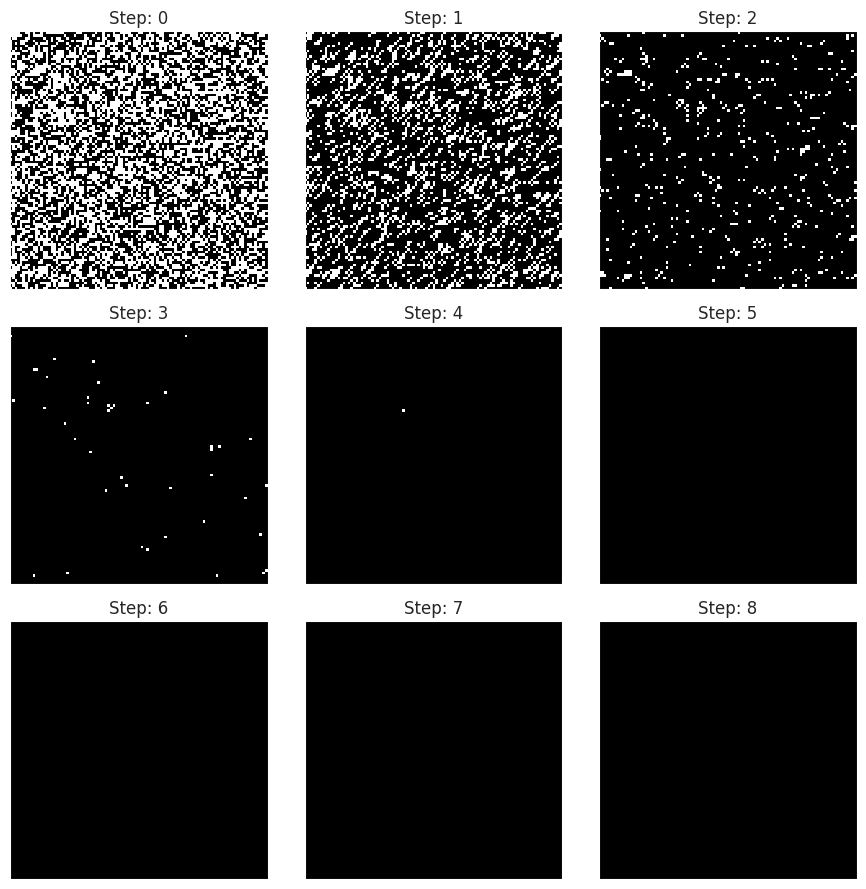

Figure saved as 'prisoners_dilemma_series_1.png'


<Figure size 640x480 with 0 Axes>

In [7]:
# Simulation 1
# Parameters for the first simulation scenario
payoffs = 5, 3, 1, 0
rows = 100
total_steps = 100   # Total number of steps in the simulation
num_plots = 9       # Number of plots to display (should be a perfect square for a square grid)
skip_interval = 1  # Number of steps to skip between plots
prob = 0.5

# Initialize the automaton
automaton = PrisonersDilemma2D(payoffs, rows)
automaton.init_random(prob)

# Create a grid of plots and save it
automaton.plot_2D_series(total_steps, num_plots, skip_interval, filename='prisoners_dilemma_series_1.png')

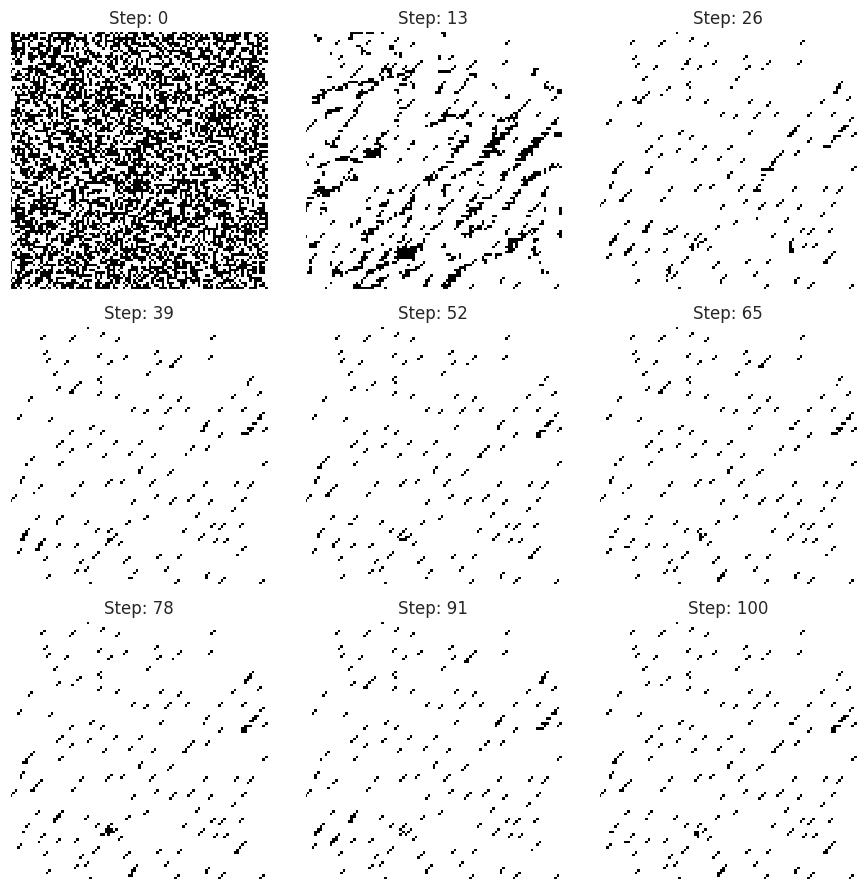

Figure saved as 'prisoners_dilemma_series_2.png'


<Figure size 640x480 with 0 Axes>

In [8]:
# Simulation 2
# Adjusted payoffs for a different dynamic
# Parameters
payoffs = 1.1, 1, 0, -0.1
rows = 100
total_steps = 100   # Total number of steps in the simulation
num_plots = 9       # Number of plots to display (should be a perfect square for a square grid)
skip_interval = 13  # Number of steps to skip between plots
prob = 0.5

# Initialize the automaton
automaton = PrisonersDilemma2D(payoffs, rows)
automaton.init_random(prob)

# Create a grid of plots and save it
automaton.plot_2D_series(total_steps, num_plots, skip_interval, filename='prisoners_dilemma_series_2.png')

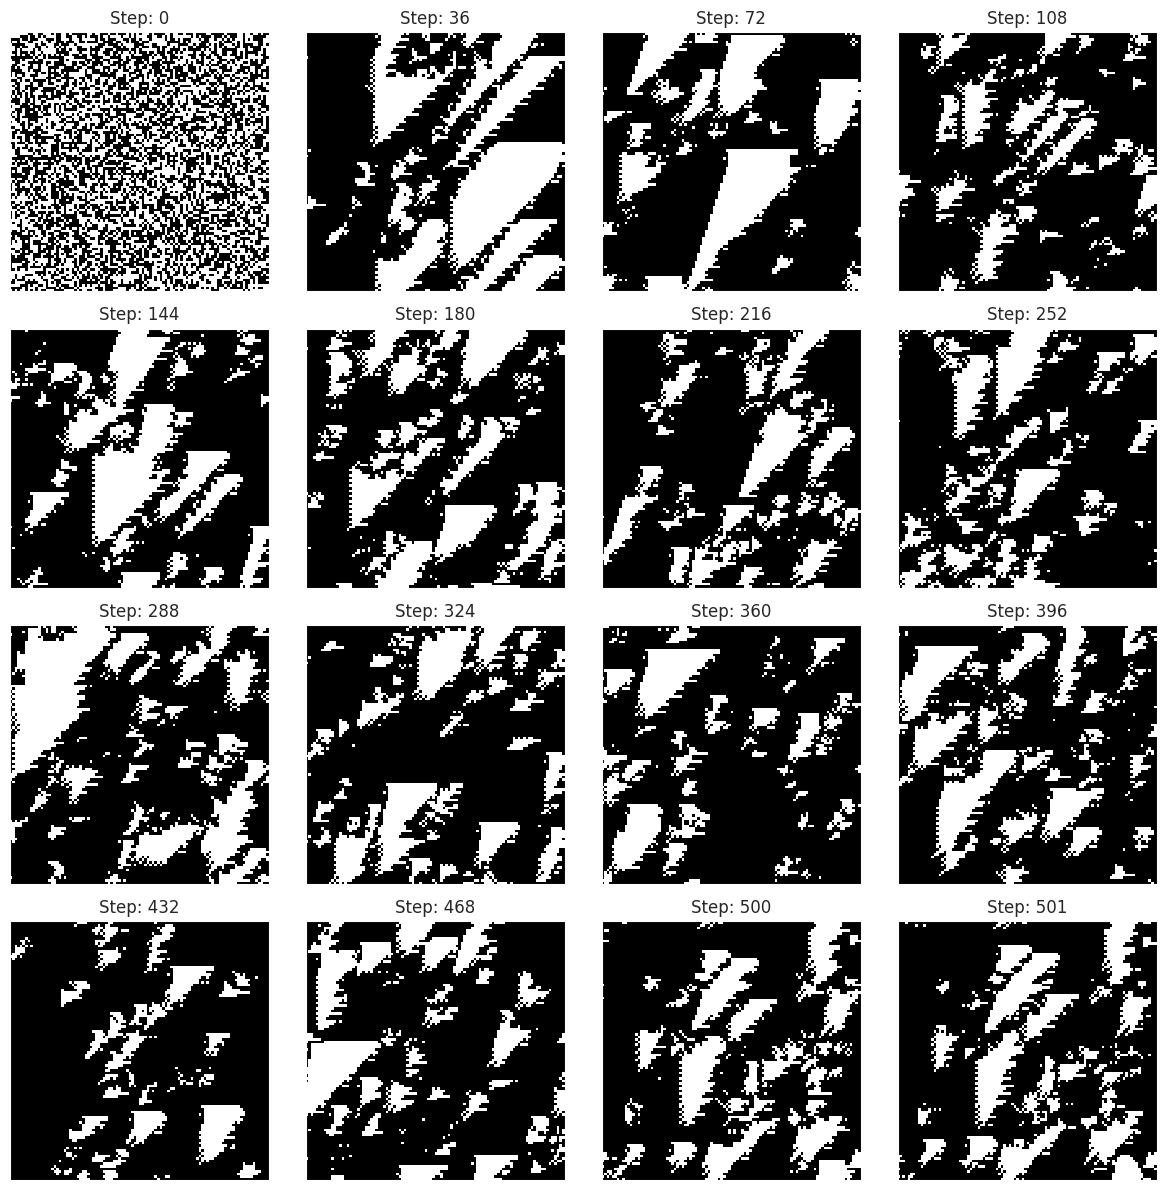

Figure saved as 'prisoners_dilemma_series_3.png'


<Figure size 640x480 with 0 Axes>

In [9]:
# Simulation 3
# Further adjusted payoffs and increased total steps and skip interval for a longer and more spaced-out visualization
# Parameters
payoffs = 1.6, 1, 0, -0.1
rows = 100
total_steps = 500   # Total number of steps in the simulation
num_plots = 16       # Number of plots to display (should be a perfect square for a square grid)
skip_interval = 36  # Number of steps to skip between plots
prob = 0.5

# Initialize the automaton
automaton = PrisonersDilemma2D(payoffs, rows)
automaton.init_random(prob)

# Create a grid of plots and save it
automaton.plot_2D_series(total_steps, num_plots, skip_interval, filename='prisoners_dilemma_series_3.png')

In [10]:
!pip install numpy matplotlib seaborn scipy egtplot

  Preparing metadata (setup.py) ... done
  Created wheel for egtplot: filename=egtplot-0.5-py3-none-any.whl size=11963 sha256=5768bd0a58ec9f0438cab472c18c9d4babcd171ed6a5ca390be2ff0fcf287e37
  Stored in directory: /root/.cache/pip/wheels/da/3f/9c/6e9d1dd13f49c1f2dd29834f5cd306650da2a09696ef85dd36
Successfully built egtplot


In [11]:
# Import the plot_static function from egtplot
# The egtplot library is specifically designed for visualizing evolutionary game theory (EGT) models. The plot_static function is used to create static visual representations of evolutionary game dynamics. These visualizations can depict the phase space of strategies, showing equilibrium points, strategy stability, and population dynamics over time. Using plot_static enhances the interpretability of EGT simulations, making it easier to convey complex dynamics and outcomes through graphical means.
from egtplot import plot_static

1it [00:00,  5.29it/s]


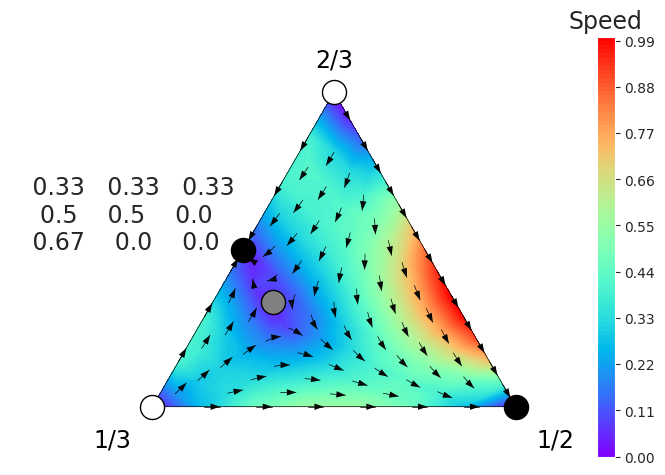

In [12]:
payoff_entries = [[1/3], [1/3], [1/3], [1/2], [1/2], [0], [2/3], [0], [0]]
labels = ["1/3", "1/2", "2/3"]

simplex = plot_static(payoff_entries, vert_labels=labels, background=True)